# 匯入所需套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#將檔案讀入
rfm=pd.read_csv('rfm_data.csv')

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))  # Initialize MinMaxScaler to scale values between 0 and 1

# 把 R F M 欄位取出
df = rfm[['R', 'F', 'M']] 

# 準備標準化
scaler.fit(df)  # 計算每一欄的最小和最大，準備 Min-Max Scaling
df_minmax = scaler.transform(df)  # 使用 Min-Max Scaling 標準化資料

# 將標準化後的資料轉換成 DataFrame
df_minmax = pd.DataFrame(df_minmax, columns=['R', 'F', 'M']) 
df_minmax

,R,F,M
0,0.875749,0.000000,0.005796
1,0.016467,0.000000,0.004963
2,0.110778,0.009009,0.012102
3,0.982036,0.000000,0.004590
4,0.215569,0.000000,0.005710
...,...,...,...
43667,0.314371,0.000000,0.002784
43668,0.161677,0.009009,0.013260
43669,0.467066,0.000000,0.003222
43670,0.047904,0.000000,0.000519


In [5]:
#設定K-Means 參數
model_KMC = KMeans(n_clusters =4, max_iter = 500, random_state = 42)
model_KMC.fit(df_minmax)
model_KMC.predict(df_minmax)

#將分群結果加入原始資料和標準化的資料
rfm['Cluster'] = model_KMC.labels_ # Add the Cluster column to the original DataFrame
df_minmax['Cluster'] = model_KMC.labels_ # Add the Cluster column to the normalized DataFrame

# 視覺化

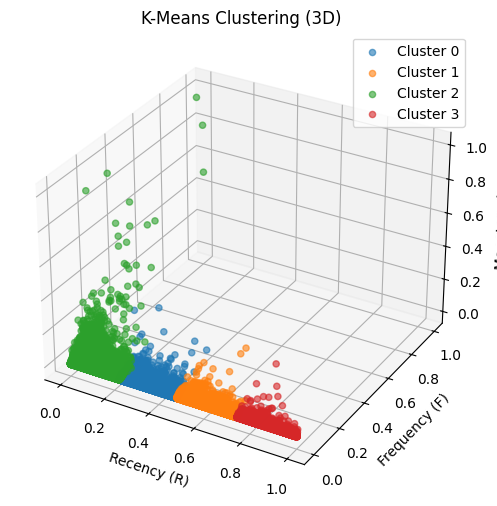

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster in 3D space
for cluster in range(model_KMC.n_clusters):
    cluster_data = df_minmax[df_minmax['Cluster'] == cluster]
    ax.scatter(cluster_data['R'], cluster_data['F'], cluster_data['M'], label=f'Cluster {cluster}', alpha=0.6)

# Add labels and title
ax.set_title('K-Means Clustering (3D)', fontsize=12)
ax.set_xlabel('Recency (R)', fontsize=10)
ax.set_ylabel('Frequency (F)', fontsize=10)
ax.set_zlabel('Monetary (M)', fontsize=10)
ax.legend()

plt.show()